In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
% matplotlib inline

# (1)

$$
P = \left(
\begin{array}{ccc}
  1 & 1 \\
  -i & i
\end{array}
\right)
\\
\\
D = \left(
\begin{array}{ccc}
  i & 0 \\
  0 & -i
\end{array}
\right)
$$

とすると、

$$
P^{-1}JP = D
$$

と対角化できる。

ここで、

$$
 x = 
\left[\begin{array}{c}
    p \\
    q \\
\end{array}\right] \quad
$$

とし、

$$
x = Pu
$$

と置くと、

$$
\begin{eqnarray}
\dot{u} &=& P^{-1}\dot{x} \\ &=& P^{-1}Jx \\ &=& P^{-1}JPP^{-1}x \\ &=& Du
\end{eqnarray}
$$

つまり、

$$
u = \left[\begin{array}{c}
    u_1 \\
    u_2 \\
\end{array}\right] \quad
$$

として、

$$
\dot{u_1} = iu_1
$$

$$
\dot{u_2} = -iu_2
$$

$$
u_1(0) = \frac{1}{2}
$$

$$
u_2(0) = \frac{1}{2}
$$

と書ける。

よって、uについて数値的に考察すれば、

$$
x = Pu
$$

を用いて

$$
 x = 
\left[\begin{array}{c}
    p \\
    q \\
\end{array}\right] \quad
$$

の挙動を数値的に考えていくことができる。

また、この方程式を解くと、解は

$$
x = \left[\begin{array}{c}
    cos(t) \\
    sin(t) \\
\end{array}\right] \quad
$$

となる。

In [2]:
P = np.array([[1, 1], [-1j, 1j]])

def u2x(u_1_array, u_2_array):
    return  np.array([np.dot(P, np.array([[u_1], [u_2]])) for u_1, u_2 in zip(u_1_array, u_2_array)])

def plot_x(x, title):
    plt.scatter(x[0, 0], x[0, 1], color='green', label='Start')
    plt.scatter(x[-1, 0], x[-1, 1], color='red', label='End')
    plt.plot(x[:, 0], x[:, 1], alpha = 0.7)
    
    plt.legend()
    plt.title(title)
    plt.xlabel('p')
    plt.ylabel('q')
    plt.grid()
    plt.axis('equal')
    plt.show()

In [3]:
def f_1(x):
    return 1j * x

def f_2(x):
    return -1j * x

## 真の解

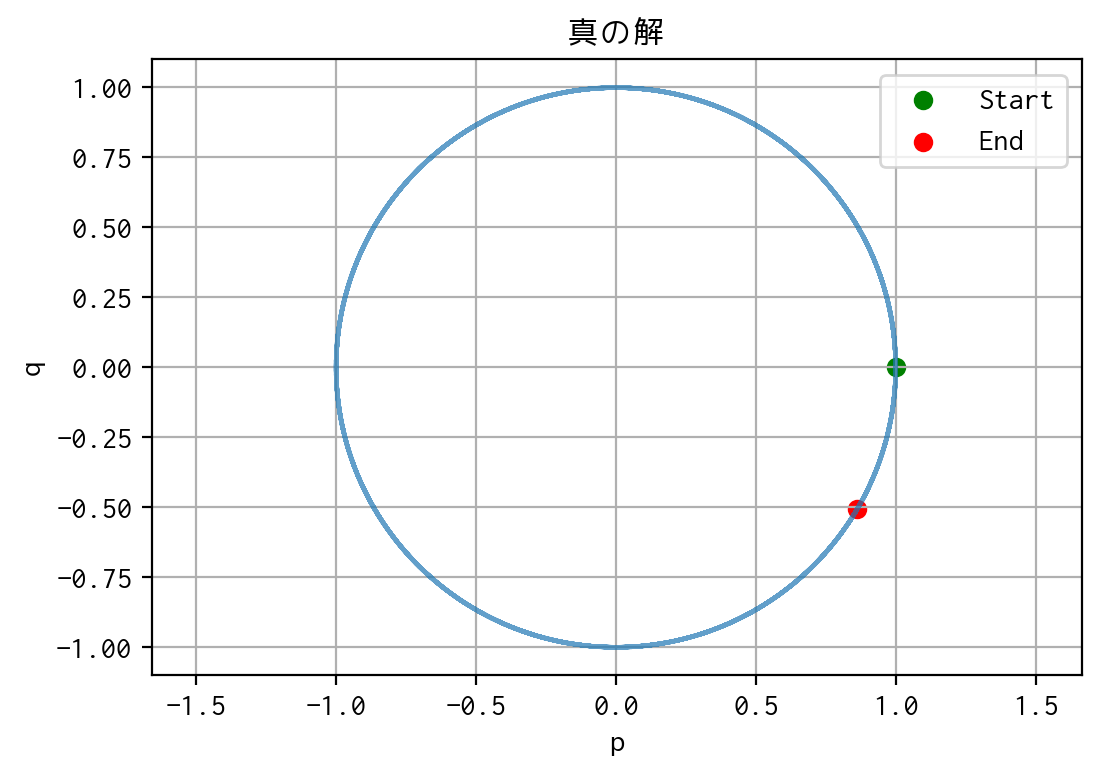

In [4]:
T = [i * 0.1 for i in range(1001)]
x = np.array([[[math.cos(t)], [math.sin(t)]] for t in T])

plot_x(x, '真の解')

## 陽的Euler法

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


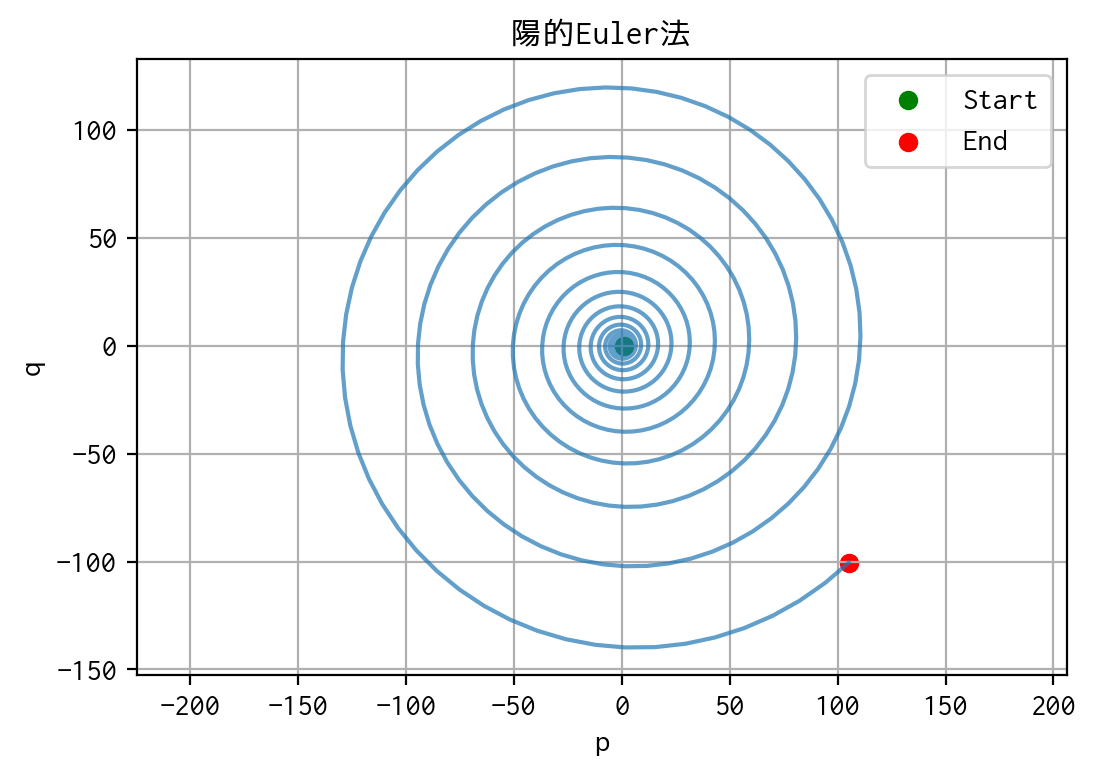

In [5]:
def explicit_euler_method(f, x_0, h = 0.1, T = 100):
    t = 0
    xs = [x_0]
    while t < T:
        xs.append(h * f(xs[-1]) + xs[-1])
        t += h
    return xs

u_1 = explicit_euler_method(f_1, 0.5)
u_2 = explicit_euler_method(f_2, 0.5)

x = u2x(u_1, u_2)

plot_x(x, '陽的Euler法')

## 陰的Euler法

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


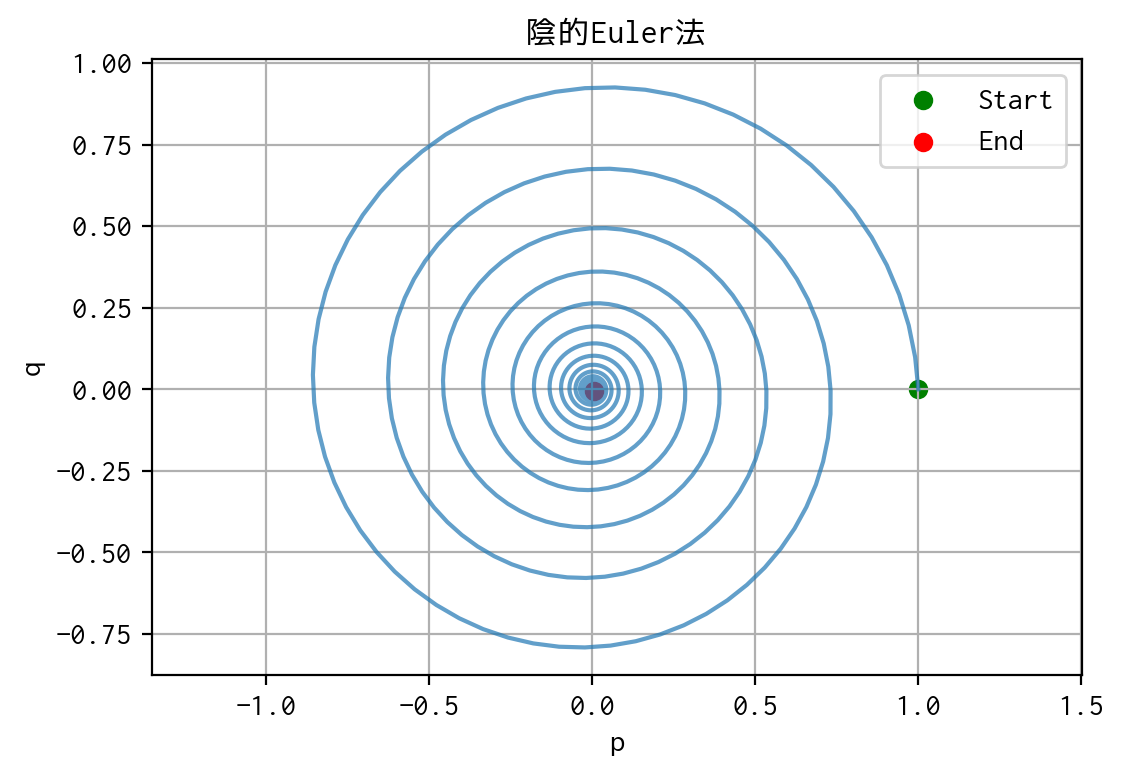

In [6]:
def u_1_implicit_euler_method(x_0, h = 0.1, T = 100):
    t = 0
    xs = [x_0]
    while t < T:
        xs.append(xs[-1] / (1 - 1j * h))
        t += h
    return xs

def u_2_implicit_euler_method(x_0, h = 0.1, T = 100):
    t = 0
    xs = [x_0]
    while t < T:
        xs.append(xs[-1] / (1 + 1j * h))
        t += h
    return xs

u_1 = u_1_implicit_euler_method(0.5)
u_2 = u_2_implicit_euler_method(0.5)

x = u2x(u_1, u_2)

plot_x(x, '陰的Euler法')

## 台形則

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


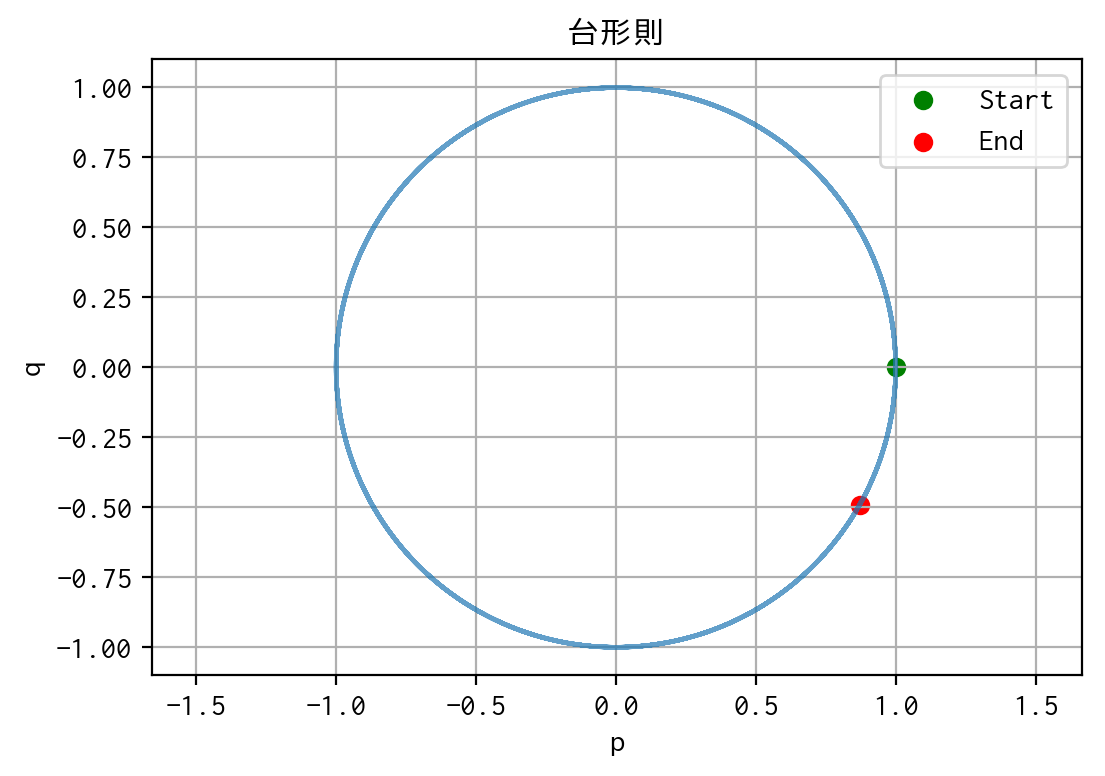

In [7]:
def u_1_trapezoidal_rule(x_0, h = 0.1, T = 100):
    t = 0
    xs = [x_0]
    while t < T:
        xs.append((2 + h * 1j) / (2 - h * 1j) * xs[-1])
        t += h
    return xs

def u_2_trapezoidal_rule(x_0, h = 0.1, T = 100):
    t = 0
    xs = [x_0]
    while t < T:
        xs.append((2 - h * 1j) / (2 + h * 1j) * xs[-1])
        t += h
    return xs

u_1 = u_1_trapezoidal_rule(0.5)
u_2 = u_2_trapezoidal_rule(0.5)

x = u2x(u_1, u_2)

plot_x(x, '台形則')

## Runge-Kutta法

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


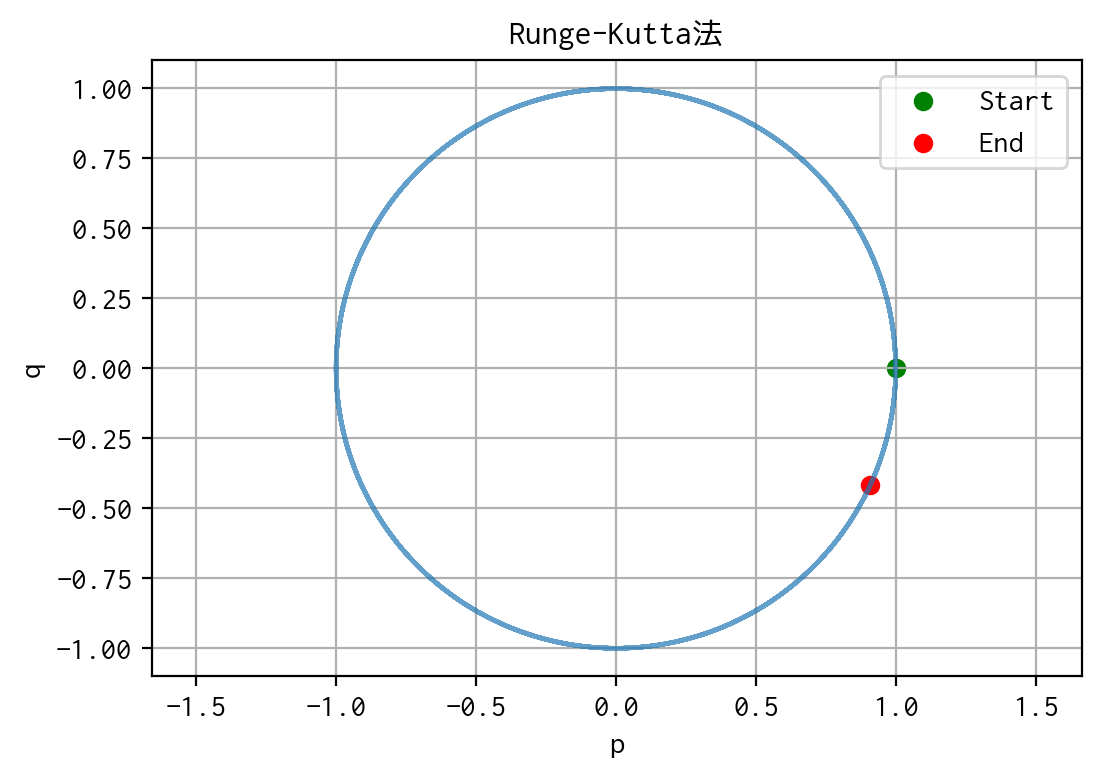

In [8]:
def runge_kutta_method(f, x_0, h = 0.1, T = 100):
    t = 0
    xs = [x_0]
    while t < T:
        y_n = xs[-1]
        k_1 = f(y_n)
        k_2 = f(y_n + h / 2 * k_1)
        k_3 = f(y_n + h / 2 * k_2)
        k_4 = f(y_n + h * k_3)
        xs.append(xs[-1] + h * (k_1 / 6 + k_2 / 3 + k_3 / 3 + k_4 / 6))
        t += h
    return xs

u_1 = runge_kutta_method(f_1, 0.5)
u_2 = runge_kutta_method(f_2, 0.5)

x = u2x(u_1, u_2)

plot_x(x, 'Runge-Kutta法')

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


# (2)

## 陽的Euler法

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


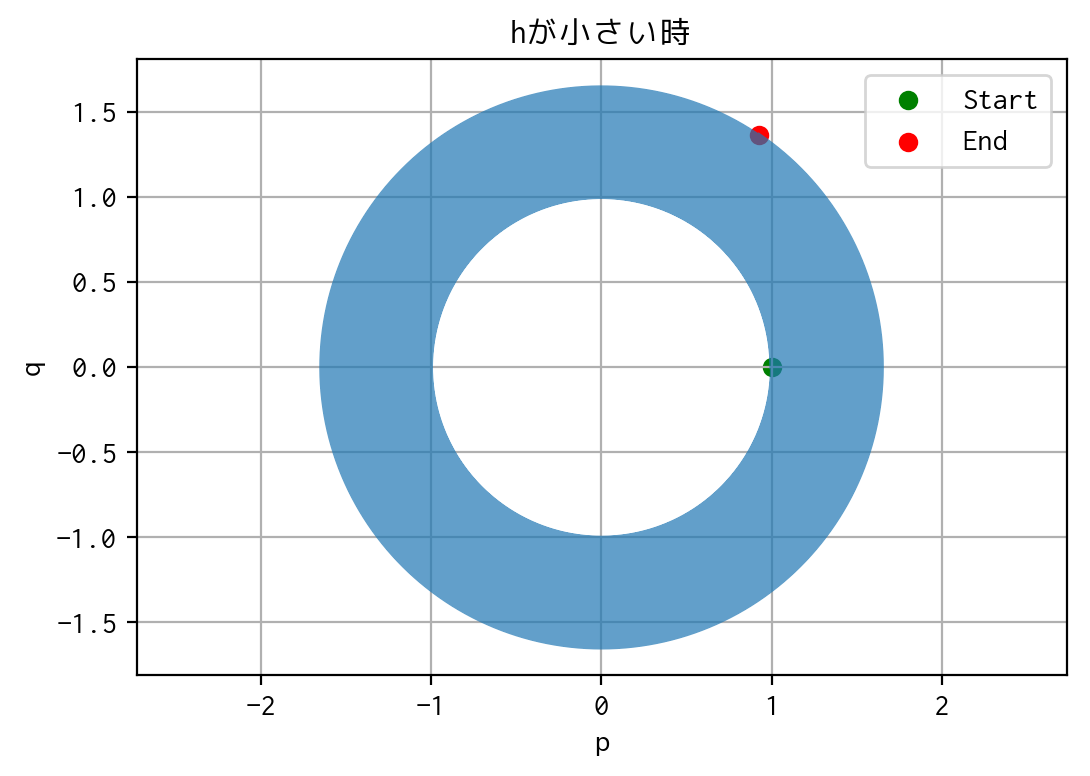

In [9]:
u_1 = explicit_euler_method(f_1, 0.5, 0.001, 1000)
u_2 = explicit_euler_method(f_2, 0.5, 0.001, 1000)

x = u2x(u_1, u_2)

plot_x(x, 'hが小さい時')

発散のスピードは小さくなっているが、やはり発散するような軌道を描いている。

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/ticker.py:1914: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


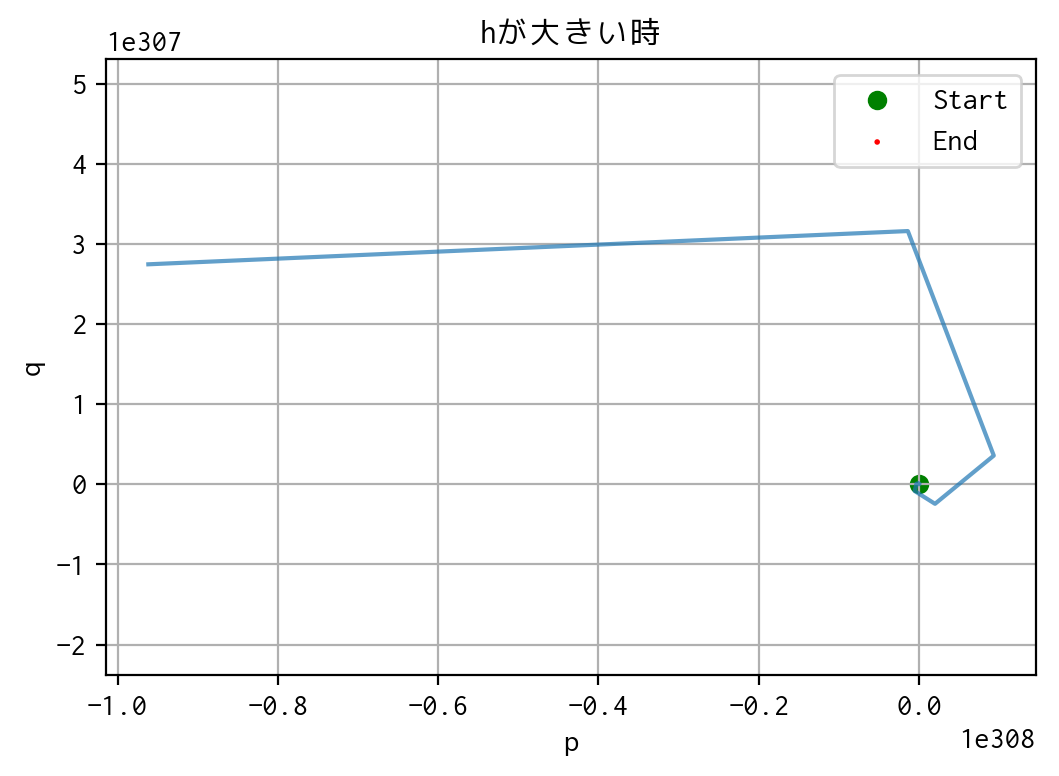

In [10]:
u_1 = explicit_euler_method(f_1, 0.5, 3, 10000)
u_2 = explicit_euler_method(f_2, 0.5, 3, 10000)

x = u2x(u_1, u_2)

plot_x(x, 'hが大きい時')

非常に早く発散し、overflowがおきている。

## 陰的Euler法

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


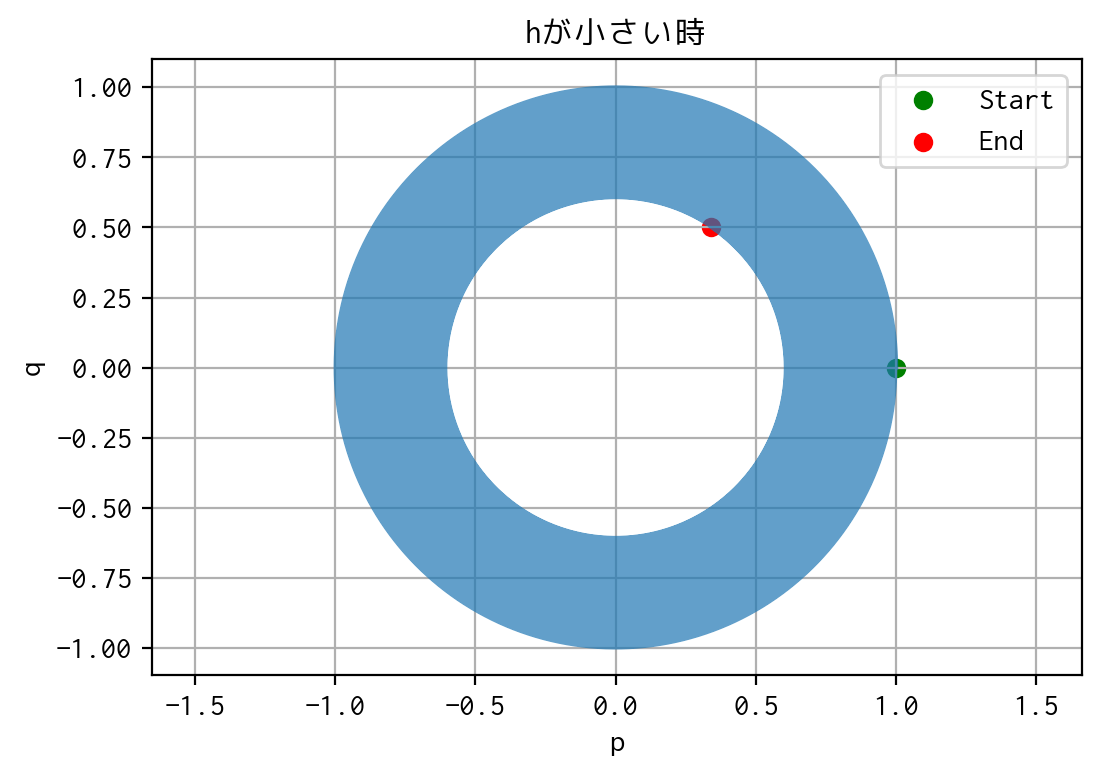

In [11]:
u_1 = u_1_implicit_euler_method(0.5, 0.001, 1000)
u_2 = u_2_implicit_euler_method(0.5, 0.001, 1000)

x = u2x(u_1, u_2)

plot_x(x, 'hが小さい時')

収束スピードは遅いが、原点に収束しているような軌道を描いている。

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


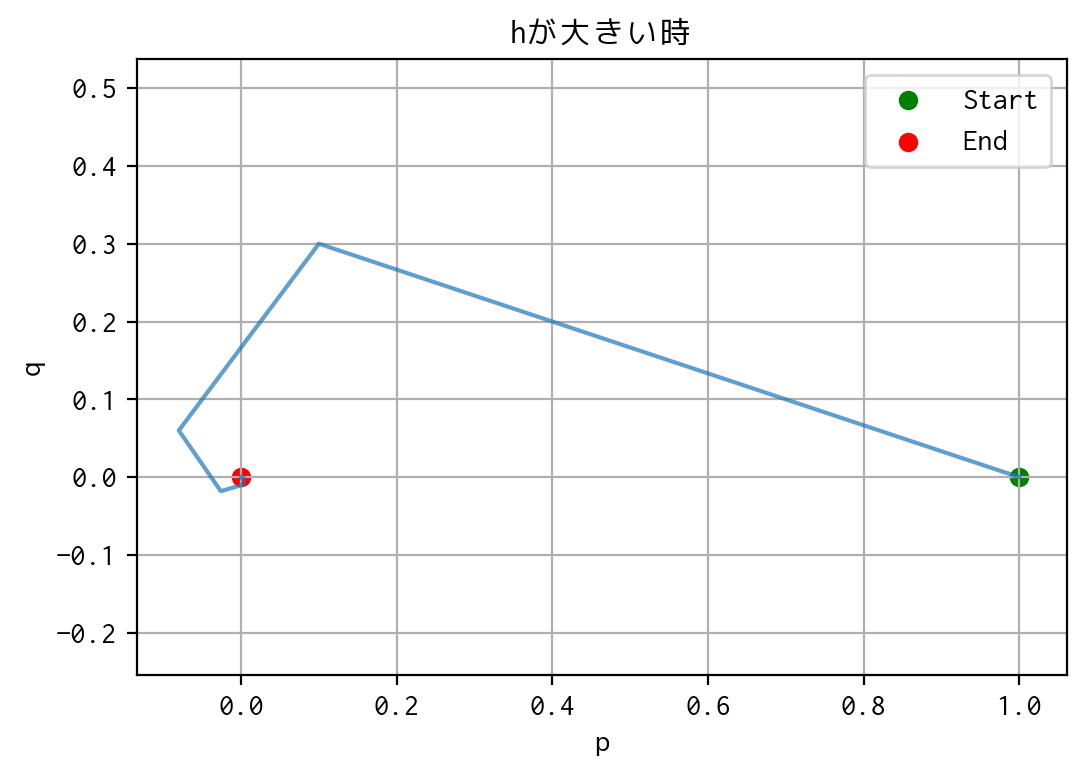

In [12]:
u_1 = u_1_implicit_euler_method(0.5, 3)
u_2 = u_2_implicit_euler_method(0.5, 3)

x = u2x(u_1, u_2)

plot_x(x, 'hが大きい時')

非常に早く原点に収束している

## 台形則

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


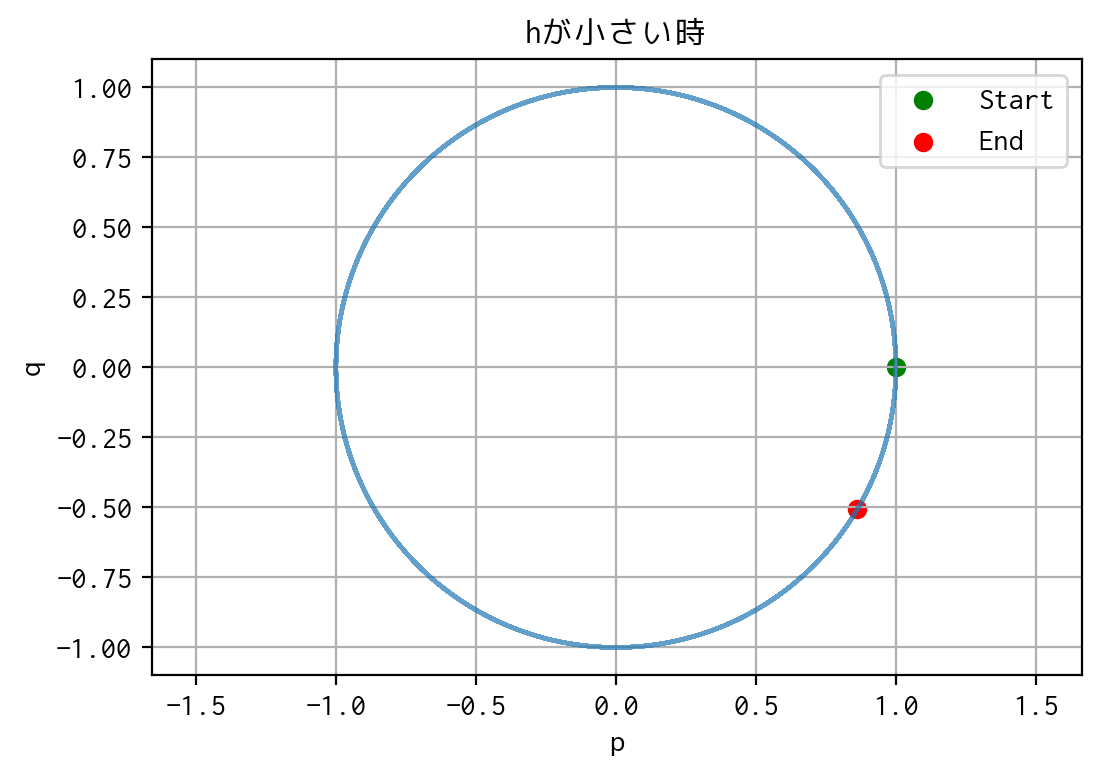

In [13]:
u_1 = u_1_trapezoidal_rule(0.5, 0.0001)
u_2 = u_2_trapezoidal_rule(0.5, 0.0001)

x = u2x(u_1, u_2)

plot_x(x, 'hが小さい時')

hが小さい時は安定した正しい軌道を与える。

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


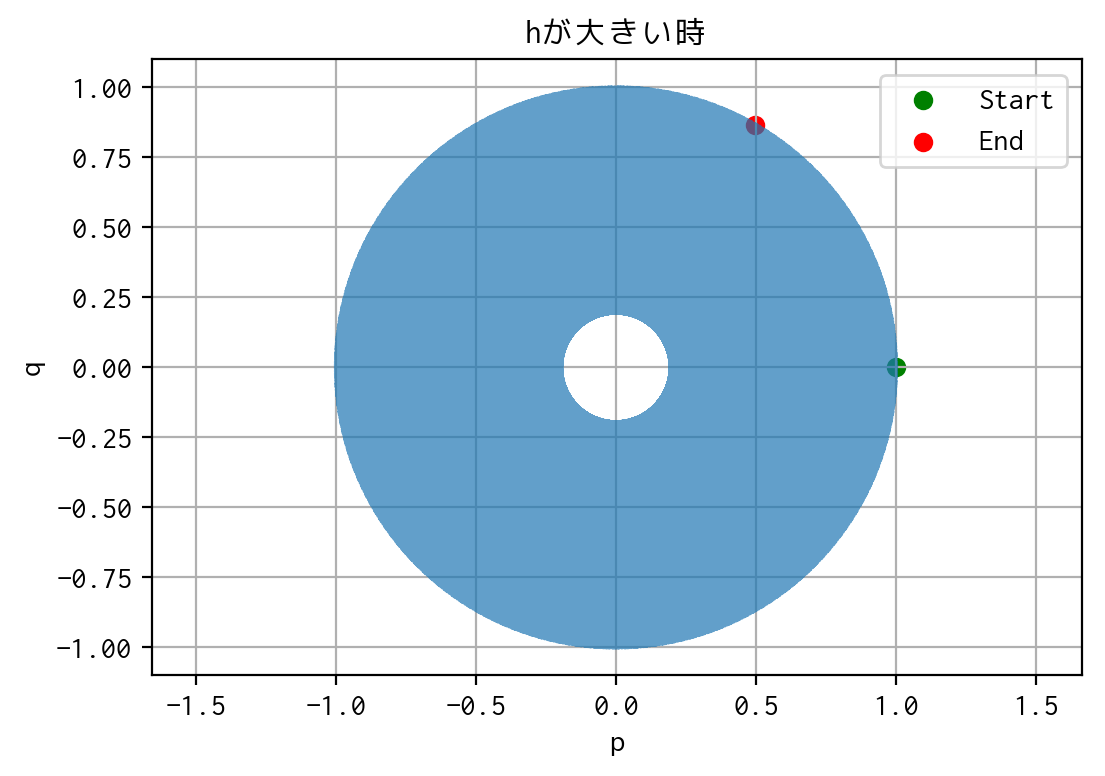

In [14]:
u_1 = u_1_trapezoidal_rule(0.5, 10, 10000)
u_2 = u_2_trapezoidal_rule(0.5, 10, 10000)

x = u2x(u_1, u_2)

plot_x(x, 'hが大きい時')

hが大きくてグラフが見にくいので、描画メソッドを編集する(plotではなく、scatterにする)

In [15]:
def scatter_x(x, title):
    plt.scatter(x[:, 0], x[:, 1], alpha = 0.7)
    plt.scatter(x[0, 0], x[0, 1], color='yellow', label='Start')
    plt.scatter(x[-1, 0], x[-1, 1], color='red', label='End')
    
    plt.legend()
    plt.title(title)
    plt.xlabel('p')
    plt.ylabel('q')
    plt.grid()
    plt.axis('equal')
    plt.show()

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


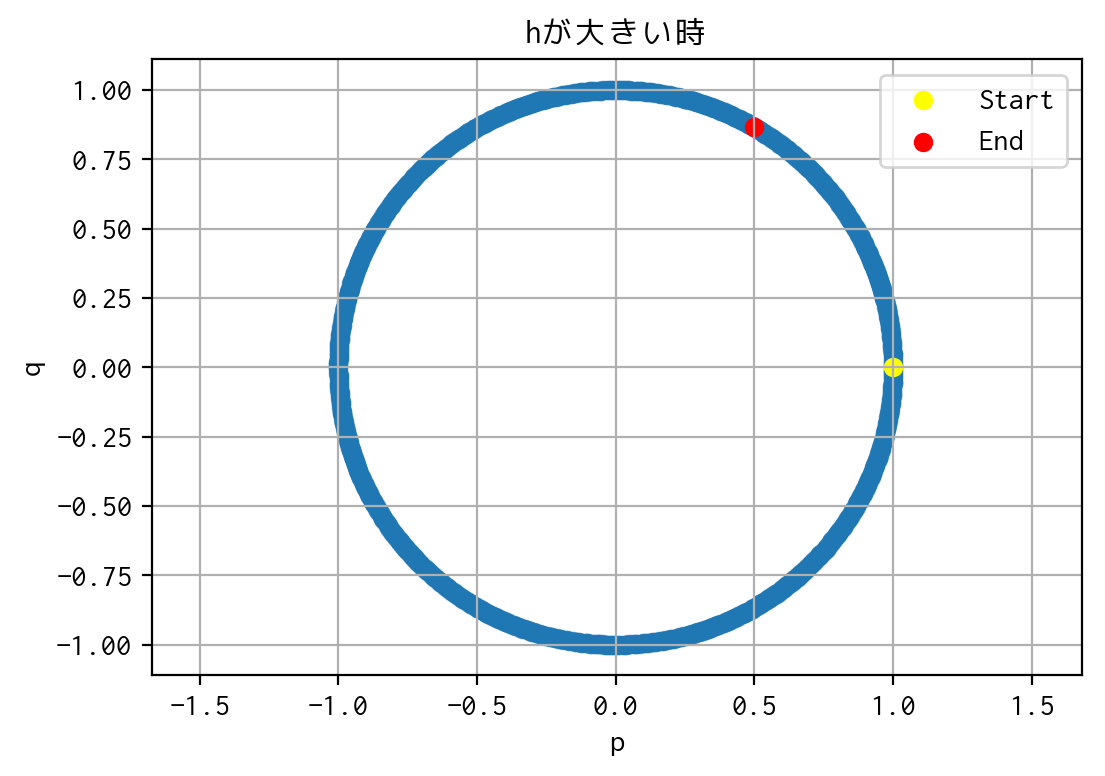

In [16]:
scatter_x(x, 'hが大きい時')

台形則では、hは大きい時も正しい軌道になることが確認できた。

## Runge-Kutta法

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


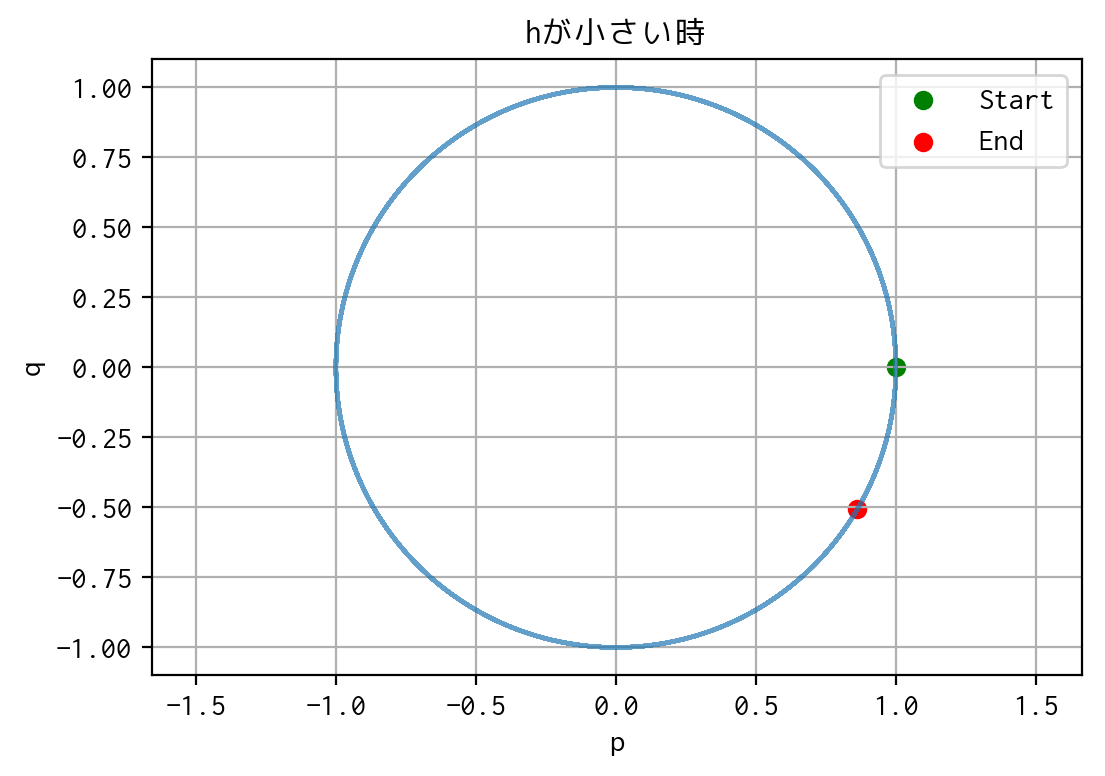

In [17]:
u_1 = runge_kutta_method(f_1, 0.5, 0.0001)
u_2 = runge_kutta_method(f_2, 0.5, 0.0001)

x = u2x(u_1, u_2)

plot_x(x, 'hが小さい時')

hを小さくしても(1)の状態と変わらない

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


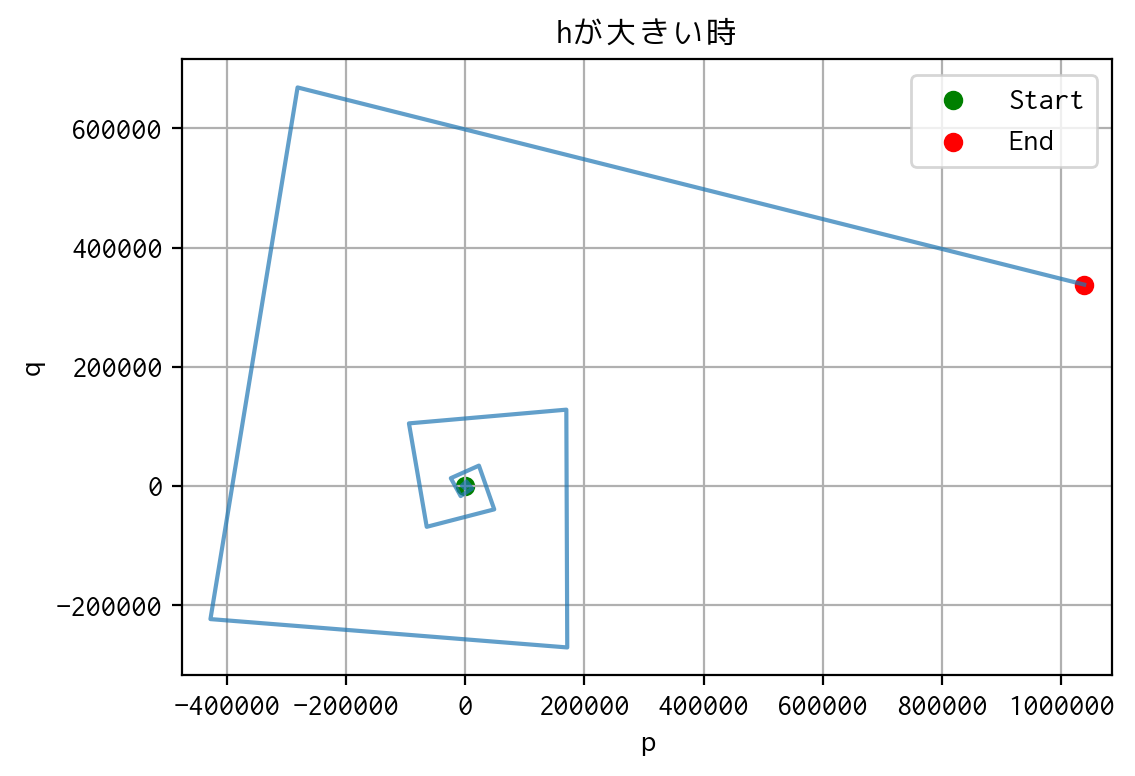

In [18]:
u_1 = runge_kutta_method(f_1, 0.5, 3)
u_2 = runge_kutta_method(f_2, 0.5, 3)

x = u2x(u_1, u_2)

plot_x(x, 'hが大きい時')

hを十分大きくすると(h = 3)発散してしまっている。